In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from datetime import datetime

In [ ]:
pip install numpy pandas matplotlib statsmodels yfinance ib_insync

In [ ]:
import yfinance as yf

# Define the ticker symbols for KO and PEP
tickers = ["KO", "PEP"]
#tickers = ["MSFT", "AAPL"]
#tickers = ["V" , "MA"]
#tickers = ["PG" , "JNJ"]

# Retrieve the historical prices for the tickers
prices = yf.download(tickers, start="2020-01-01", end="2023-03-18")['Adj Close']

# Print the last 5 rows of the prices DataFrame
print(prices.tail())

[*********************100%%**********************]  2 of 2 completed
                   KO         PEP
Date                             
2023-03-13  57.980751  170.003525
2023-03-14  58.194019  169.827362
2023-03-15  58.581783  172.861221
2023-03-16  58.904148  172.743774
2023-03-17  58.630627  171.393219


In [ ]:
asset1 = prices[tickers[0]]
asset2 = prices[tickers[1]]

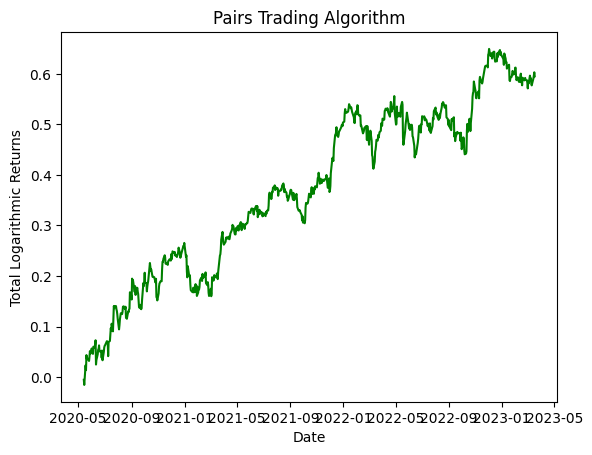

In [ ]:
# Compute the rolling mean and standard deviation for each asset
window = 30
asset1_mean = asset1.rolling(window=window).mean()
asset1_std = asset1.rolling(window=window).std()
asset2_mean = asset2.rolling(window=window).mean()
asset2_std = asset2.rolling(window=window).std()

# Compute the z-scores for each asset based on its rolling mean and standard deviation
z1 = (asset1 - asset1_mean) / asset1_std
z2 = (asset2 - asset2_mean) / asset2_std

# Compute the spread between the two assets
spread = z1 - z2

# Compute the rolling mean and standard deviation of the spread
spread_mean = spread.rolling(window=window).mean()
spread_std = spread.rolling(window=window).std()

# Compute the rolling z-score for the spread
# spread_zscore = (spread - spread_mean) / spread_std

# Compute the upper and lower bounds for the spread
upper_bound = spread_mean + 2 * spread_std
lower_bound = spread_mean - 2 * spread_std

# Compute the long and short signals
long_signal = (spread < lower_bound).astype(int)
short_signal = (spread > upper_bound).astype(int)

# Compute the positions for each asset
asset1_position = long_signal - short_signal
asset2_position = -long_signal + short_signal

# Extend the signal
asset1_position_old = asset1_position.copy()
asset1_position[asset1_position == 0] = np.nan
asset1_position.ffill(inplace=True)
asset2_position_old = asset1_position.copy()
asset2_position[asset2_position == 0] = np.nan
asset2_position.ffill(inplace=True)

# Long-only Strategy
asset1_position[asset1_position < 0] = 0
asset2_position[asset2_position < 0] = 0

# Compute the percentage change for each asset
asset1_returns = asset1.pct_change()
asset2_returns = asset2.pct_change()

# Compute the portfolio returns
portfolio_returns = asset1_position.shift(1) * asset1_returns + \
                    asset2_position.shift(1) * asset2_returns

# Note: asset1_position and asset2_position should already be defined in your code,
# corresponding to the positions in asset1 and asset2 based on the trading signals.


# Compute the total logarithmic returns and plot the results
#total_log_returns = portfolio_log_returns.cumsum()
#plt.figure(figsize=(12, 6))
#plt.plot(total_log_returns, label='Portfolio Log Returns')
#plt.title("Pairs Trading Algorithm")
#plt.xlabel("Date")
#plt.ylabel("Cumulative Log Returns")
#plt.legend()
#plt.show()

# Assuming 'portfolio_returns' is a pandas Series of daily percentage returns of your portfolio
# The following line converts percentage returns to logarithmic returns and computes the cumulative product
total_logarithmic_returns = (portfolio_returns + 1).cumprod().apply(np.log)

# Now plotting the total logarithmic returns
plt.plot(total_logarithmic_returns.index, total_logarithmic_returns.values, color = "g")
plt.title("Pairs Trading Algorithm")
plt.xlabel("Date")
plt.ylabel("Total Logarithmic Returns")
plt.show()

<Axes: xlabel='Date'>

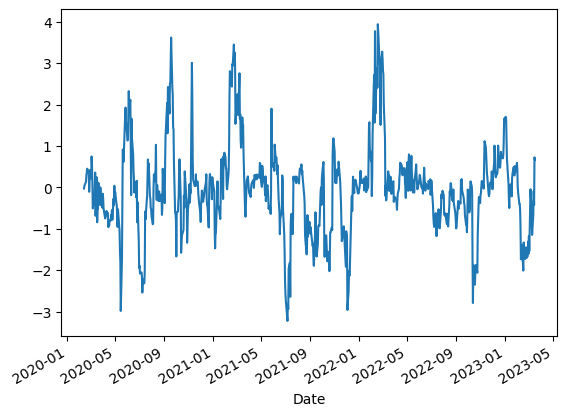

In [ ]:
spread.plot()

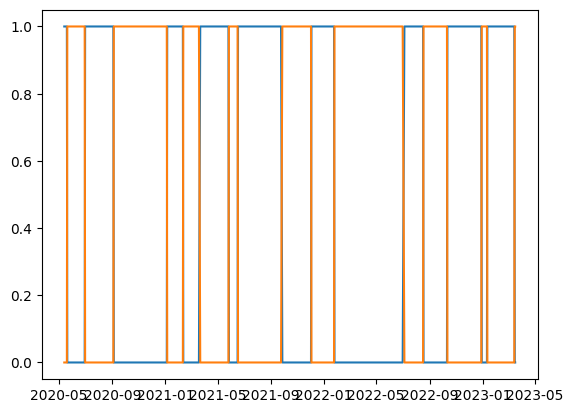

In [ ]:
# Plot the trading signal - what does it look like?
plt.plot(asset1_position)
plt.plot(asset2_position)

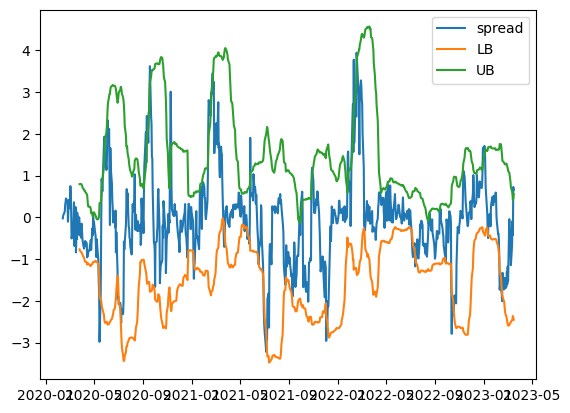

In [ ]:
# What should the trading signal be? Plot spread vs UB / LB
plt.plot(spread, label='spread')
plt.plot(lower_bound, label='LB')
plt.plot(upper_bound, label='UB')
plt.legend();

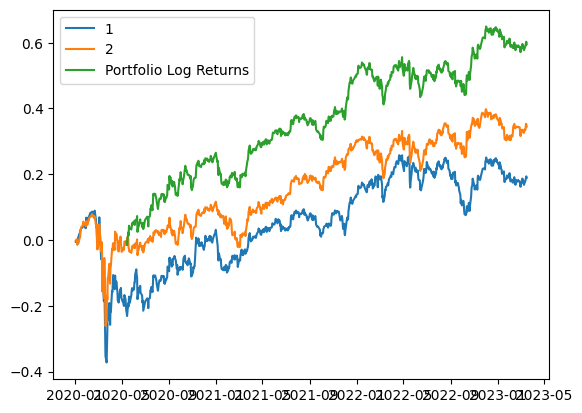

In [ ]:
# Compare with buy-and-hold
plt.plot(asset1_log_returns.cumsum(), label = '1')
plt.plot(asset2_log_returns.cumsum(), label = '2')
plt.plot(total_log_returns, label='Portfolio Log Returns')
plt.legend();